In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split   # Used for splitting arrays or matrices into train and test subsets.
from sklearn.neighbors import KNeighborsClassifier     # Used for implementing the k-nearest neighbors value. 
from sklearn.metrics import confusion_matrix           # Used for evaluate the accuracy of a model.
from sklearn.metrics import classification_report  
from sklearn.metrics import accuracy_score     
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt# Used for building a text report.

df=pd.read_csv(r'C:\Users\HP\diabetes.csv')
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())

   slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
0     1  Female  80.0           0.0            1.0           never  25.19   
1     2  Female  54.0           0.0            0.0         No Info  27.32   
2     3    Male  28.0           0.0            0.0           never  27.32   
3     4  Female  36.0           0.0            0.0         current  23.45   
4     5    Male  76.0           1.0            1.0         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  height  weight  
0          6.6                  140         0  171.52   74.11  
1          6.6                   80         0  176.48   83.74  
2          5.7                  158         0  163.29   58.46  
3          5.0                  155         0  187.04   52.77  
4          4.8                  155         0  154.72   68.39  
     slno  gender   age  hypertension  heart_disease smoking_history    bmi  \
695   696  Female  62.0           0.0            0.0            ever  27.2

In [2]:
# Check for missing values in the dataset
# Impute missing values with the mean for numerical columns and mode for categorical columns

print(df.isnull().sum())
print(df.isnull().mean()*100)
for col in df.columns :
    if(df[col].dtype=="object"):
        df[col].fillna(df[col].mode()[0],inplace=True)
    else : 
        df[col].fillna(df[col].median(),inplace=True)
print(df.isnull().sum())

# Interpretation:
# - Ensure that no missing values remain after the imputation process.
# - Helps to confirm that the missing values were handled properly

slno                   0
gender                 3
age                    5
hypertension           2
heart_disease          1
smoking_history        5
bmi                    3
HbA1c_level            2
blood_glucose_level    0
diabetes               0
height                 0
weight                 0
dtype: int64
slno                   0.000000
gender                 0.428571
age                    0.714286
hypertension           0.285714
heart_disease          0.142857
smoking_history        0.714286
bmi                    0.428571
HbA1c_level            0.285714
blood_glucose_level    0.000000
diabetes               0.000000
height                 0.000000
weight                 0.000000
dtype: float64
slno                   0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
height                 0
weight       

In [3]:
# Remove the column 'sl.no',weight,height'
df.drop(columns=['slno','height','weight'], inplace=True)
print("\nColumns after removing 'sl.no':")
print(df.columns)


Columns after removing 'sl.no':
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


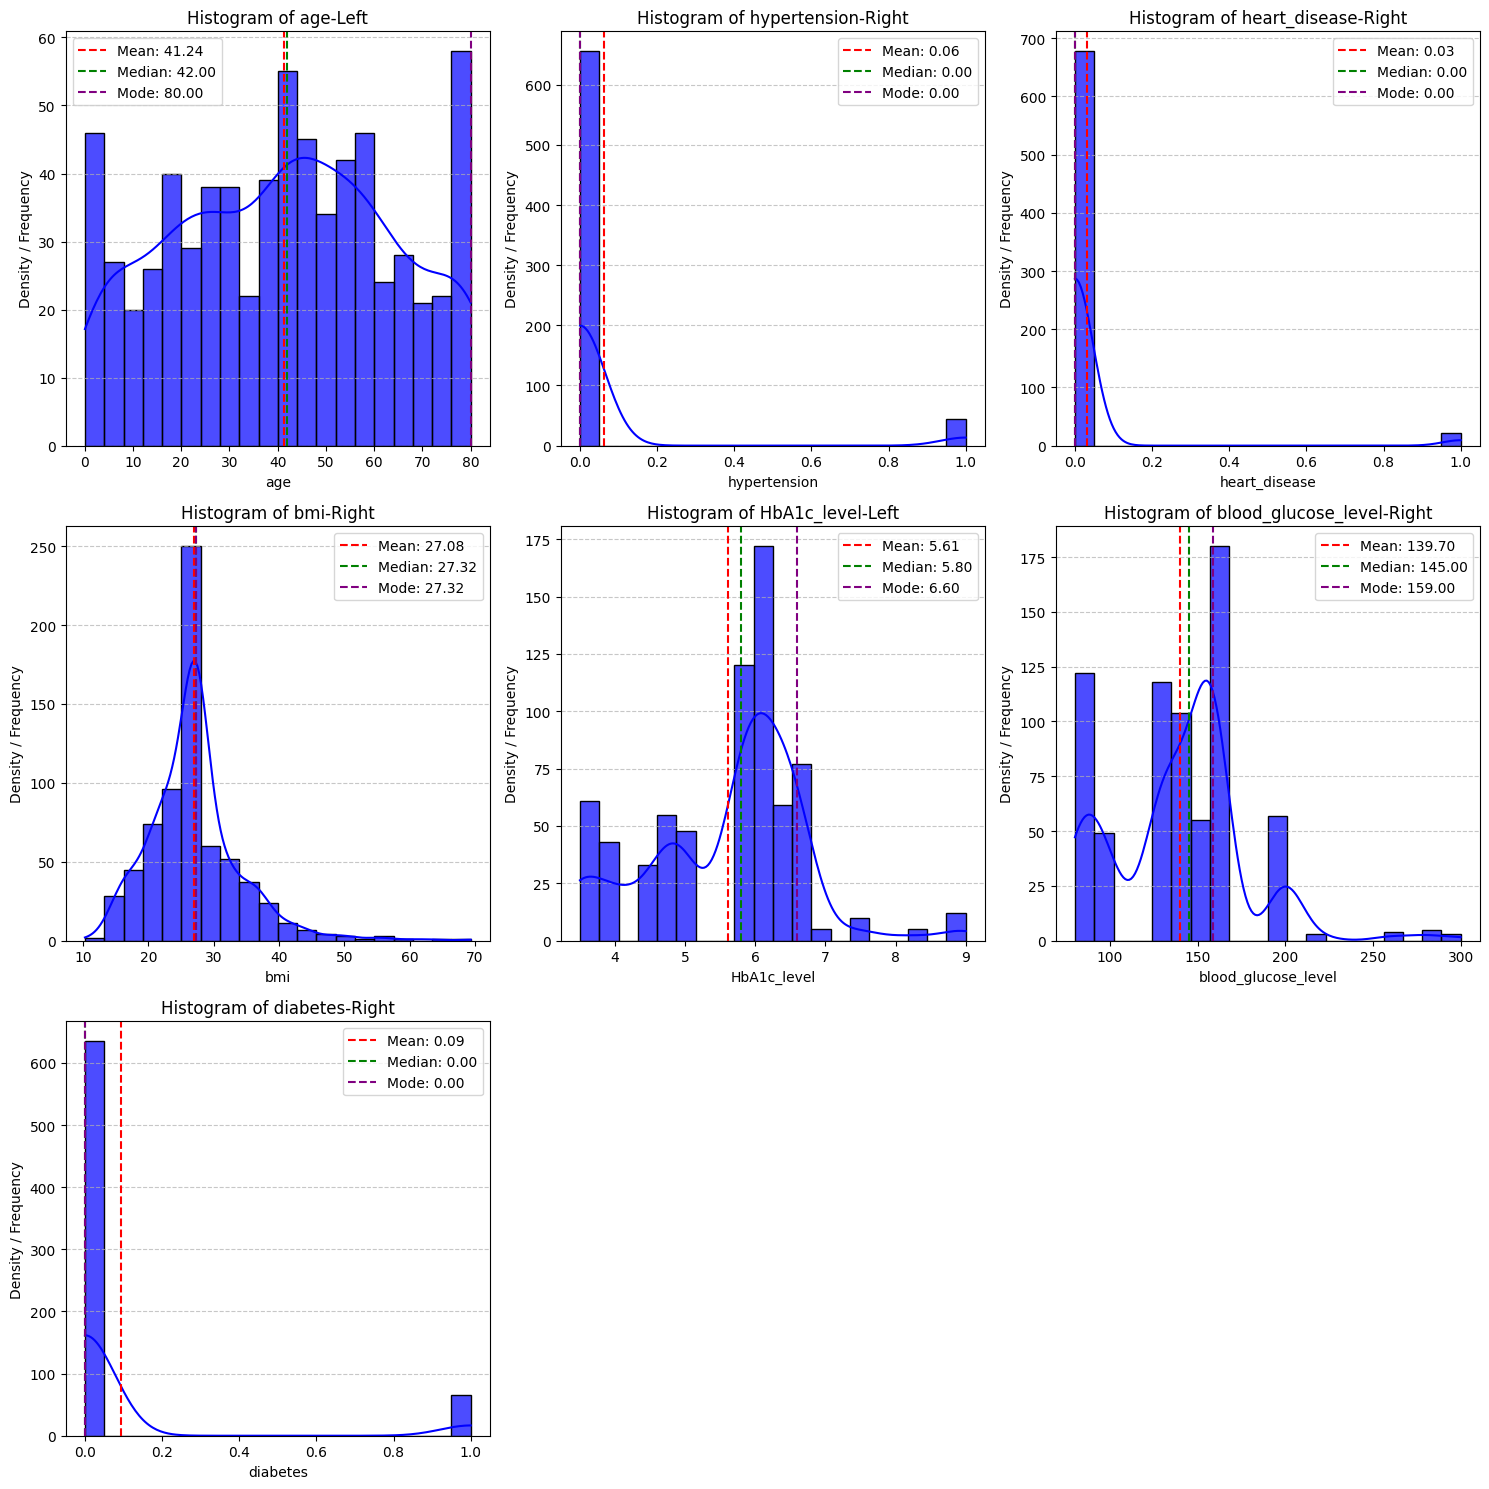

In [4]:
# Univariate Analysis : Plot histograms and check skewness for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
rows = (len(numerical_columns) // 3) + (1 if len(numerical_columns) % 3 != 0 else 0)
cols = min(len(numerical_columns), 3)

plt.figure(figsize=(15, rows * 5))
for i, col in enumerate(numerical_columns, 1):
    # Mean, Median, and Skewness Calculation
    mean = df[col].mean()
    median = df[col].median()
    skewness = df[col].skew()

    # Determine skewness type
    if skewness > 0:
        skew='Right'
    elif skewness < 0:
        skew='Left'
    else:
        skew='No skew'

    plt.subplot(rows, cols, i)  
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.7)
    
    # Add mean, median, and mode lines
    mode_val = df[col].mode()[0]
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Titles and labels
    plt.title(f"Histogram of {col}-{skew}")
    plt.xlabel(col)
    plt.ylabel("Density / Frequency")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

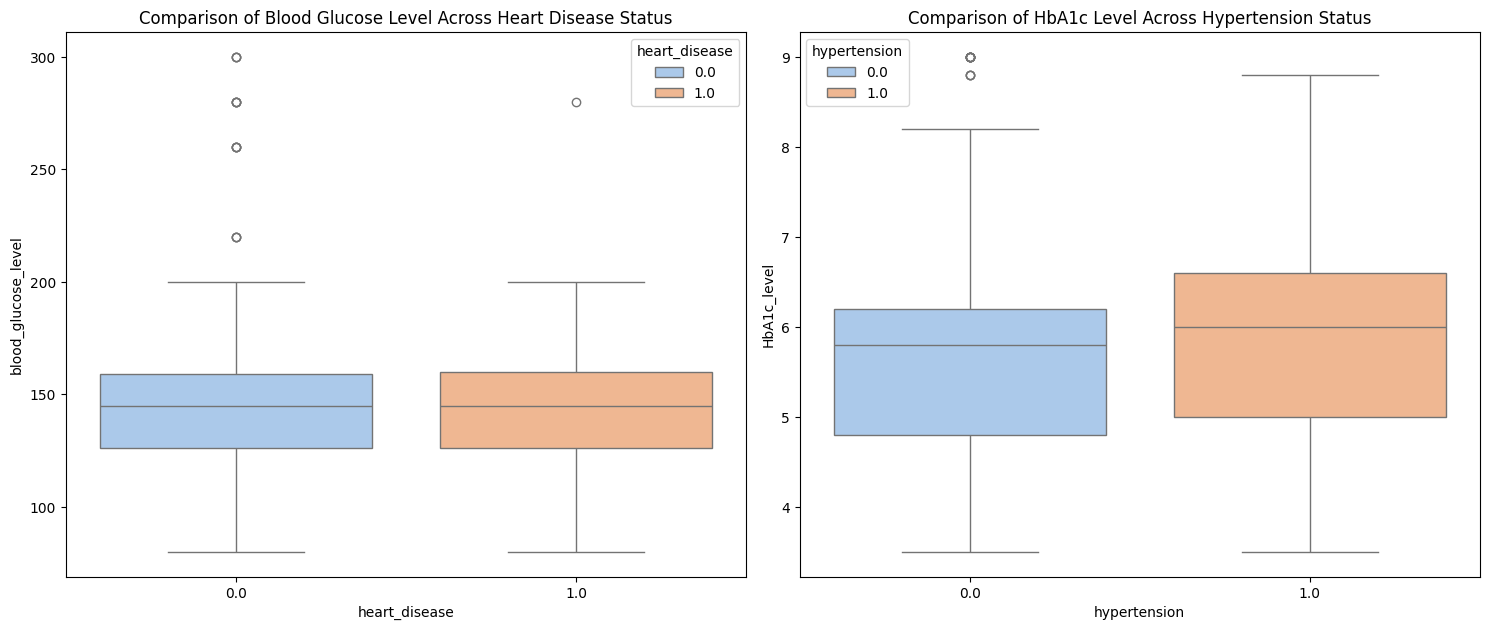

In [5]:
# Set the pastel color palette
sns.set_palette("pastel")

# Create a figure with 2 rows and 2 columns for boxplots
plt.figure(figsize=(15, 12))

# Boxplot 2: Comparison of HbA1c Level across Hypertension status
plt.subplot(2, 2, 2)
sns.boxplot(x='hypertension', y='HbA1c_level', data=df, hue='hypertension')
plt.title('Comparison of HbA1c Level Across Hypertension Status')

# Boxplot 3: Comparison of Blood Glucose Level across Heart Disease status
plt.subplot(2, 2, 1)
sns.boxplot(x='heart_disease', y='blood_glucose_level', data=df, hue='heart_disease')
plt.title('Comparison of Blood Glucose Level Across Heart Disease Status')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#Interpretation :
    # - Outliers:Dots represent outliers in the boxplot
    # - Median (Central Line): The line inside the box
    # - Interquartile Range (IQR): The distance between the 1st quartile (Q1) and 3rd quartile (Q3), which makes up the box
    # - Whiskers: Lines that extend from the box to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles.

C:\Users\HP\AppData\Local\Temp\ipykernel_3148\2620620321.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')
C:\Users\HP\AppData\Local\Temp\ipykernel_3148\2620620321.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel')


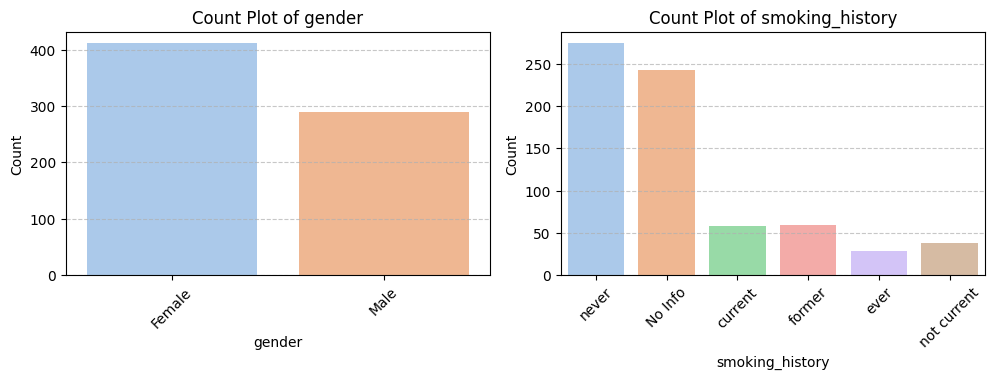

In [6]:
# Univariate Analysis - Count plots for categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns
# Plotting count plots for all categorical columns in one figure
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=column, data=df, palette='pastel')
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
#INterpretation : emake patients are more and mahorit has never smoking peoples

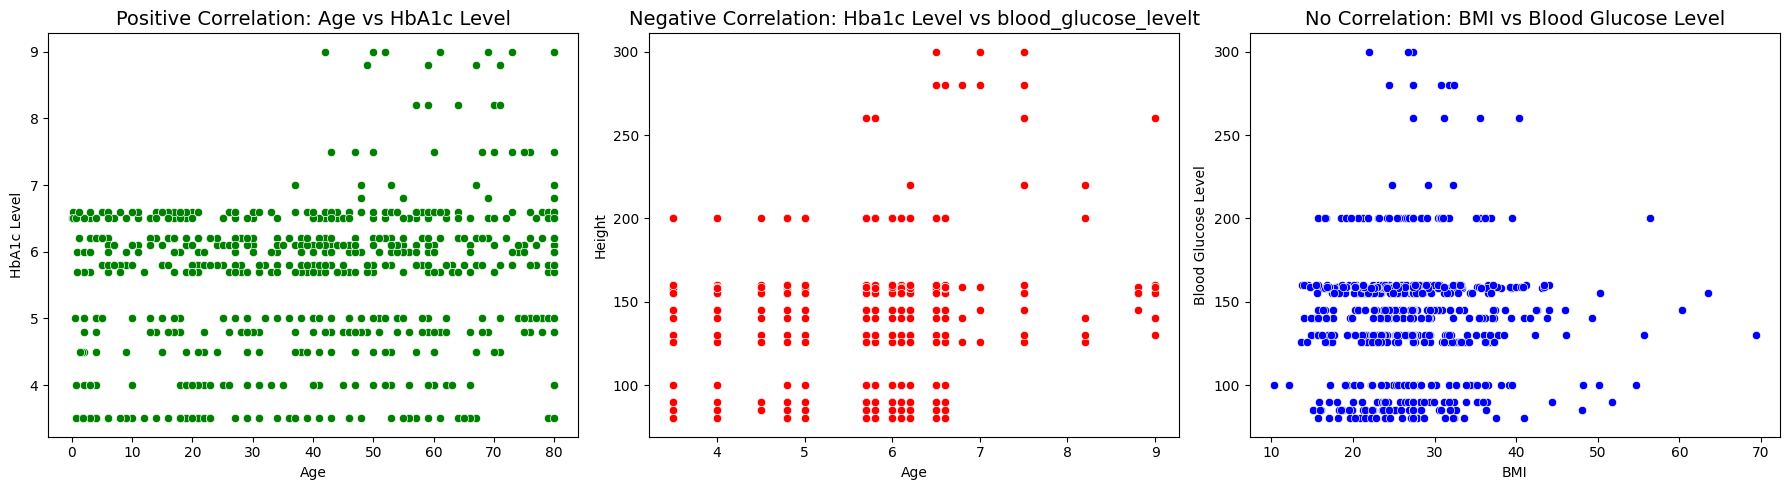

In [7]:
# Positive Correlation (e.g., age vs. HbA1c_level)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='HbA1c_level', data=df, color='green')
plt.title('Positive Correlation: Age vs HbA1c Level', fontsize=14)
plt.xlabel('Age')
plt.ylabel('HbA1c Level')

# Negative Correlation (e.g., age vs. height)
plt.subplot(1, 3, 2)
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', data=df, color='red')
plt.title('Negative Correlation: Hba1c Level vs blood_glucose_levelt', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Height')

# No Correlation (e.g., gender vs. BMI as an example if categorical, but can be extended)
plt.subplot(1, 3, 3)
sns.scatterplot(x='bmi', y='blood_glucose_level', data=df, color='blue')
plt.title('No Correlation: BMI vs Blood Glucose Level', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')

plt.tight_layout()
plt.show()
#positive Correlation: As one variable increases, so does the other (Age and HbA1c).
#Negative Correlation: As one variable increases, the other decreases (Hba1c and blood glucose).
#No Correlation: No clear trend or pattern exists between the two variables (BMI and Blood Glucose Level).

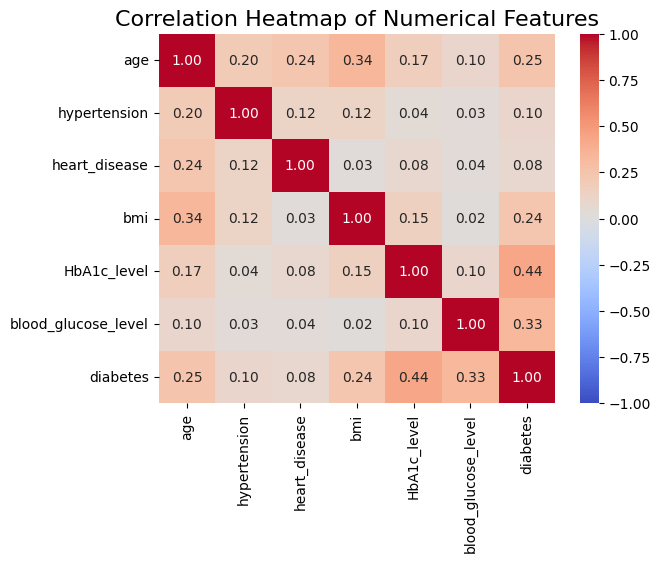

In [8]:
#Multivariate Analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

# Correlation heatmap for numerical columns in the dataset
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()
#The heatmap will display a grid where each cell represents the correlation between two variables.
    #Positive correlations are highlighted in shades of blue.
    #Negative correlations are in shades of red.
    #A correlation of 0 will be neutral (often white or gray)

In [9]:
from sklearn.preprocessing import LabelEncoder
# Encoding categorical features
df["gender"] = LabelEncoder().fit_transform(df['gender'])
df["smoking_history"] = LabelEncoder().fit_transform(df['smoking_history'])
print(df)

     gender   age  hypertension  heart_disease  smoking_history    bmi  \
0         0  80.0           0.0            1.0                4  25.19   
1         0  54.0           0.0            0.0                0  27.32   
2         1  28.0           0.0            0.0                4  27.32   
3         0  36.0           0.0            0.0                1  23.45   
4         1  76.0           1.0            1.0                1  20.14   
..      ...   ...           ...            ...              ...    ...   
695       0  62.0           0.0            0.0                2  27.27   
696       0  53.0           0.0            0.0                2  42.40   
697       0  55.0           0.0            0.0                4  35.42   
698       0  64.0           0.0            0.0                2  49.27   
699       0  40.0           0.0            0.0                4  31.16   

     HbA1c_level  blood_glucose_level  diabetes  
0            6.6                  140         0  
1          

In [10]:
X=df.drop('diabetes',axis=1).values  #independent variable - features
y=df['diabetes'].values   #dependent variable - target
print(X.shape)
print(y.shape)

#Interpretation : 
#test_size=0.4 : 40% testing ,60% training 
#random state : ensures that the data is split in the same way every time you run the code.
#stratify=y  :  both the training and testing sets have a similar proportion of 0's and 1's

(700, 8)
(700,)


In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(525, 8)
(175, 8)


In [12]:
from sklearn.preprocessing import StandardScaler
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [1]:
#Gini decision tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
plt.figure(figsize=(25,25))
features = df.columns
classes = ['Not diabetes','diabetes']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

NameError: name 'tree' is not defined

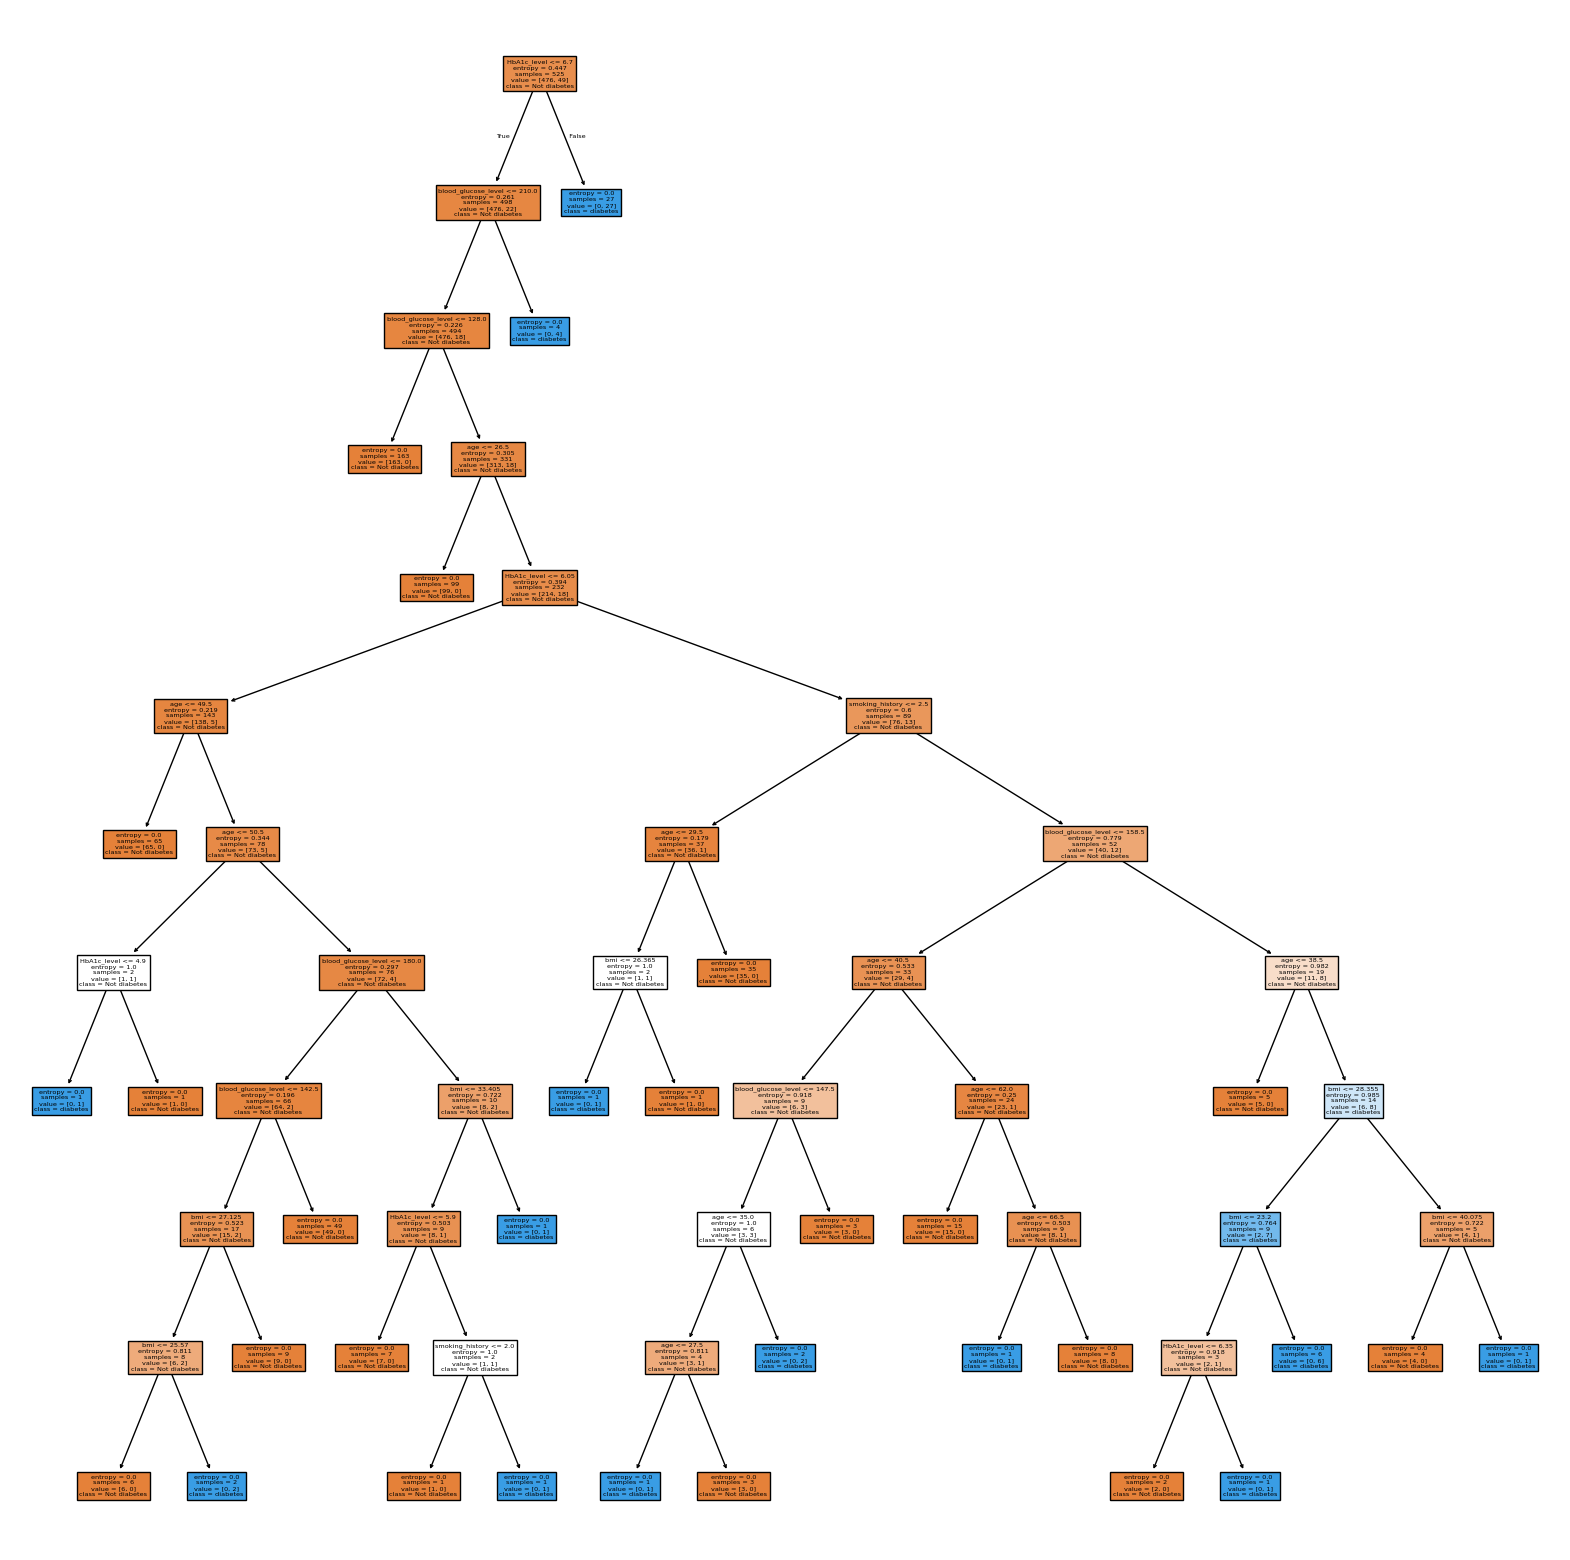

In [14]:
#entropy decision tree
clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not diabetes','diabetes']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

Gini Decision Tree
Train score: 1.0
Test score: 0.96


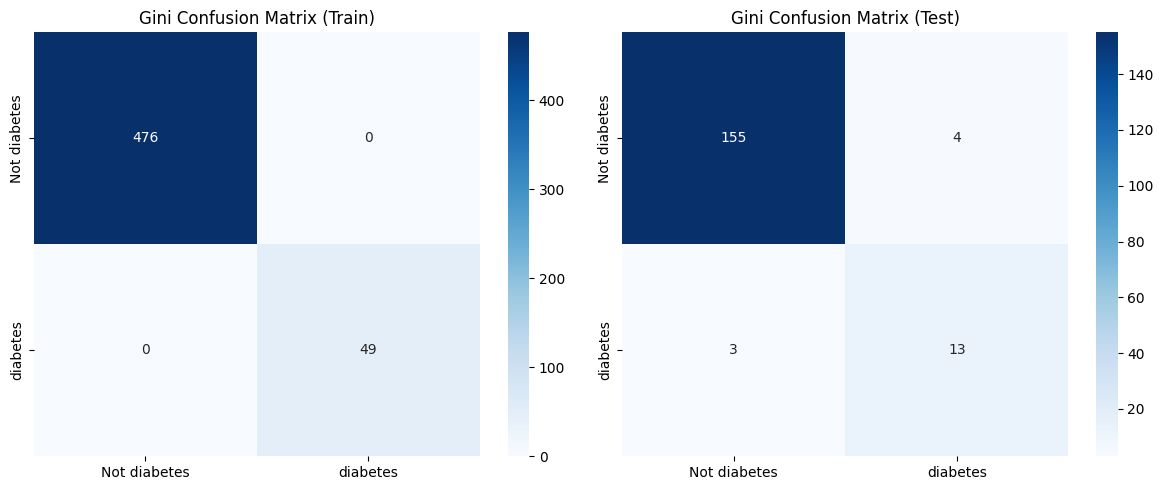


Entropy Decision Tree
Train score: 1.0
Test score: 0.9657142857142857


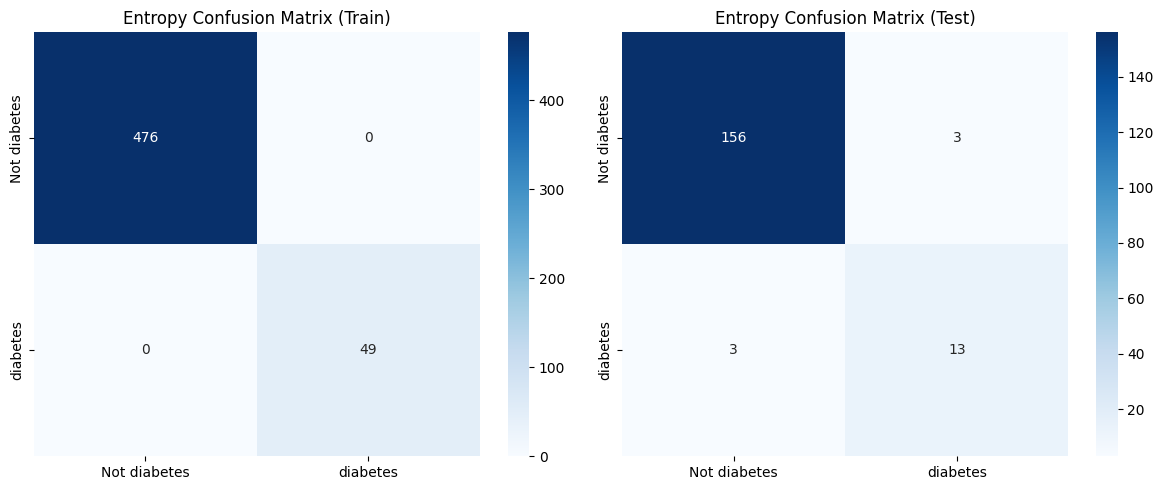

In [15]:
# Required imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Assuming you already have your data loaded in df, and x_train, y_train, x_test, y_test are defined.

# Helper function to plot confusion matrices side by side
def plot_confusionmatrix(y_train_pred, y_train, y_test_pred, y_test, dom):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a 1x2 grid of subplots
    train_cf = confusion_matrix(y_train, y_train_pred)
    test_cf = confusion_matrix(y_test, y_test_pred)
    
    # Plot train confusion matrix
    sns.heatmap(train_cf, annot=True, fmt='g', cmap='Blues', ax=axes[0], 
                xticklabels=classes, yticklabels=classes)
    axes[0].set_title(f'{dom} Confusion Matrix (Train)')
    # Plot test confusion matrix
    
    sns.heatmap(test_cf, annot=True, fmt='g', cmap='Blues', ax=axes[1], 
                xticklabels=classes, yticklabels=classes)
    axes[1].set_title(f'{dom} Confusion Matrix (Test)')
    plt.tight_layout()
    plt.show()
    
# Features and classes
features = df.columns
classes = ['Not diabetes', 'diabetes']

# 1. Gini Decision Tree
clf_gini = DecisionTreeClassifier(random_state=0)
clf_gini.fit(x_train, y_train)
y_train_pred_gini = clf_gini.predict(x_train)
y_test_pred_gini = clf_gini.predict(x_test)

# Gini Decision Tree - Corrected plot call
print("Gini Decision Tree")
print(f'Train score: {accuracy_score(y_train_pred_gini, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred_gini, y_test)}')
plot_confusionmatrix(y_train_pred_gini, y_train, y_test_pred_gini, y_test, dom='Gini')



# 2. Entropy Decision Tree
clf_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
clf_entropy.fit(x_train, y_train)
y_train_pred_entropy = clf_entropy.predict(x_train)
y_test_pred_entropy = clf_entropy.predict(x_test)
# Entropy Decision Tree - Corrected plot call
print("\nEntropy Decision Tree")
print(f'Train score: {accuracy_score(y_train_pred_entropy, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred_entropy, y_test)}')
plot_confusionmatrix(y_train_pred_entropy, y_train, y_test_pred_entropy, y_test, dom='Entropy')

In [16]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    cf = confusion_matrix(y_train_pred,y_train)
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

Train score 1.0
Test score 0.9657142857142857



Pre-Pruned Gini Decision Tree
Best Parameters (Gini): {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score: 0.97
Test score: 0.97


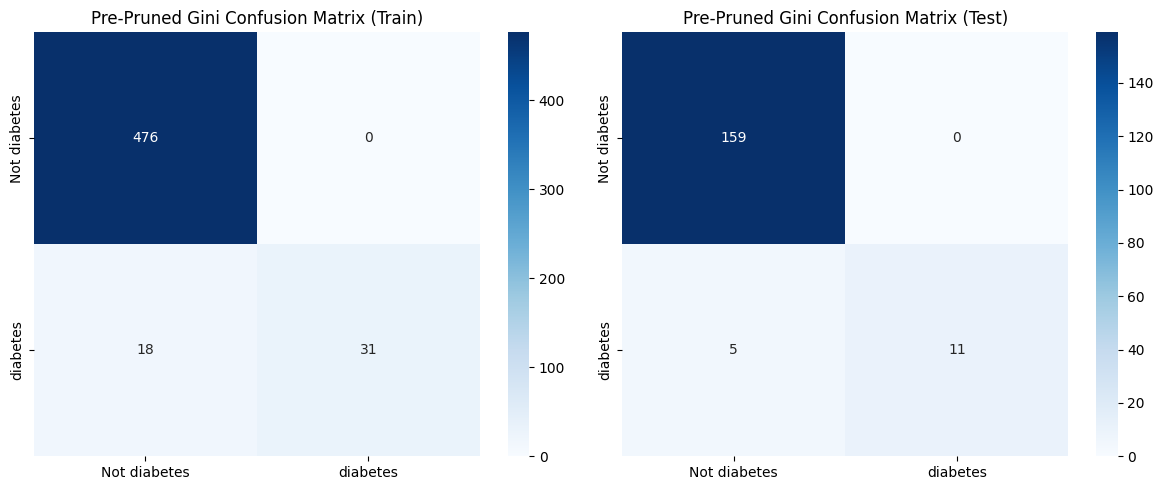

In [19]:
# Helper function to plot confusion matrices side by side
from sklearn.tree import DecisionTreeClassifier
def plot_confusionmatrix_side_by_side(y_train_pred, y_train, y_test_pred, y_test, dom):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a 1x2 grid of subplots
    train_cf = confusion_matrix(y_train, y_train_pred)
    test_cf = confusion_matrix(y_test, y_test_pred)
    
    # Plot train confusion matrix
    sns.heatmap(train_cf, annot=True, fmt='g', cmap='Blues', ax=axes[0], 
                xticklabels=classes, yticklabels=classes)
    axes[0].set_title(f'{dom} Confusion Matrix (Train)')
    # Plot test confusion matrix
    
    sns.heatmap(test_cf, annot=True, fmt='g', cmap='Blues', ax=axes[1], 
                xticklabels=classes, yticklabels=classes)
    axes[1].set_title(f'{dom} Confusion Matrix (Test)')
    plt.tight_layout()
    plt.show()
    
# Pre-pruning with Gini
params = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

# Gini Pre-pruned Decision Tree
clf_gini = DecisionTreeClassifier(random_state=0, criterion='gini')
gcv_gini = GridSearchCV(estimator=clf_gini, param_grid=params, cv=5, scoring='accuracy')
gcv_gini.fit(x_train, y_train)

# Best pre-pruned Gini model
best_model_gini = gcv_gini.best_estimator_
best_model_gini.fit(x_train, y_train)
y_train_pred_gini = best_model_gini.predict(x_train)
y_test_pred_gini = best_model_gini.predict(x_test)

print("\nPre-Pruned Gini Decision Tree")
print(f'Best Parameters (Gini): {gcv_gini.best_params_}')
print(f'Train score: {accuracy_score(y_train, y_train_pred_gini):.2f}')
print(f'Test score: {accuracy_score(y_test, y_test_pred_gini):.2f}')
plot_confusionmatrix_side_by_side(y_train_pred_gini, y_train, y_test_pred_gini, y_test, dom='Pre-Pruned Gini')



Pre-Pruned Entropy Decision Tree
Best Parameters (Entropy): {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score: 0.97
Test score: 0.97


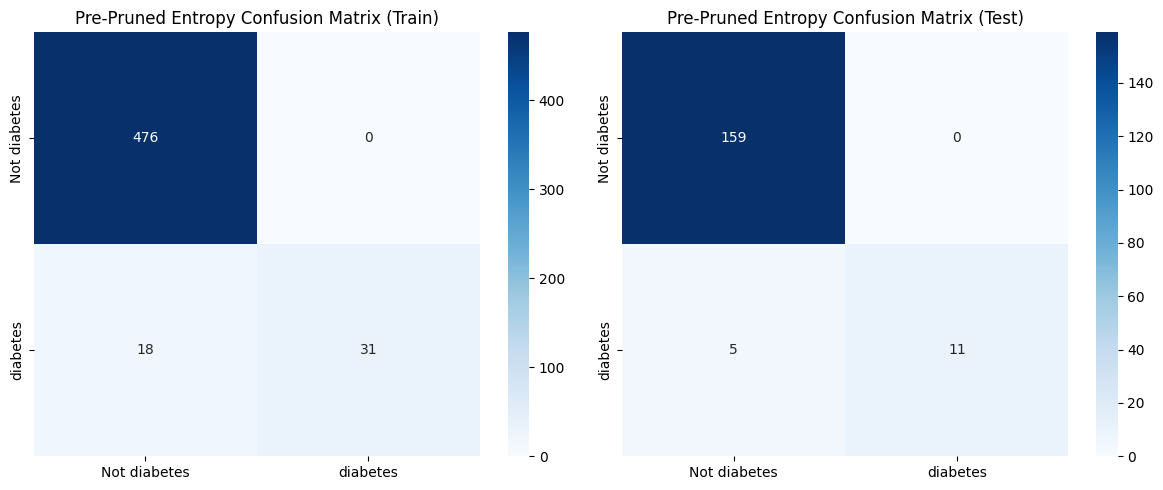

In [20]:
# Pre-pruning with Entropy
clf_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
gcv_entropy = GridSearchCV(estimator=clf_entropy, param_grid=params, cv=5, scoring='accuracy')
gcv_entropy.fit(x_train, y_train)

# Best pre-pruned Entropy model
best_model_entropy = gcv_entropy.best_estimator_
best_model_entropy.fit(x_train, y_train)
y_train_pred_entropy = best_model_entropy.predict(x_train)
y_test_pred_entropy = best_model_entropy.predict(x_test)

print("\nPre-Pruned Entropy Decision Tree")
print(f'Best Parameters (Entropy): {gcv_entropy.best_params_}')
print(f'Train score: {accuracy_score(y_train, y_train_pred_entropy):.2f}')
print(f'Test score: {accuracy_score(y_test, y_test_pred_entropy):.2f}')
plot_confusionmatrix_side_by_side(y_train_pred_entropy, y_train, y_test_pred_entropy, y_test, dom='Pre-Pruned Entropy')

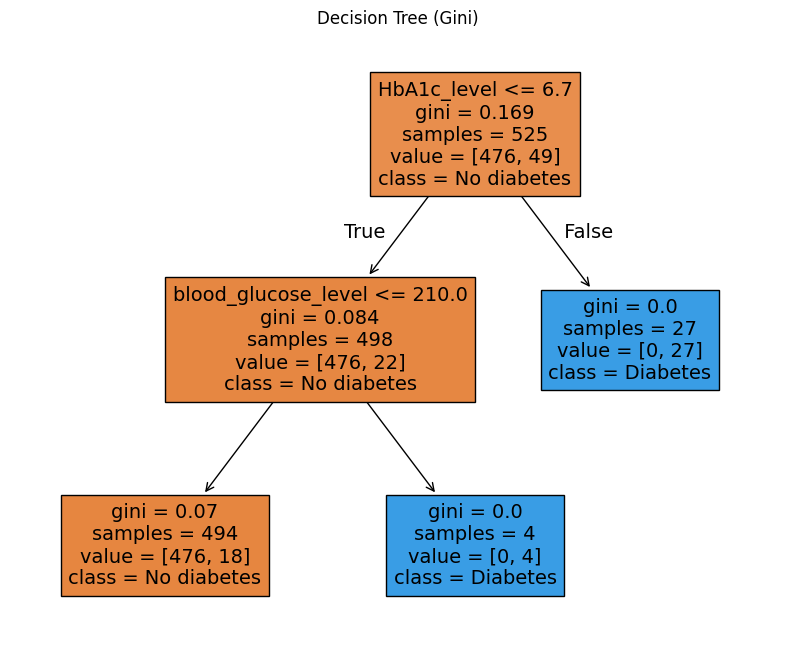

In [21]:
plt.figure(figsize=(10,8))
features = df.columns
classes = ['No diabetes','Diabetes']
tree.plot_tree(best_model_gini,feature_names=features,class_names=classes,filled=True)
plt.title("Decision Tree (Gini)")
plt.show()

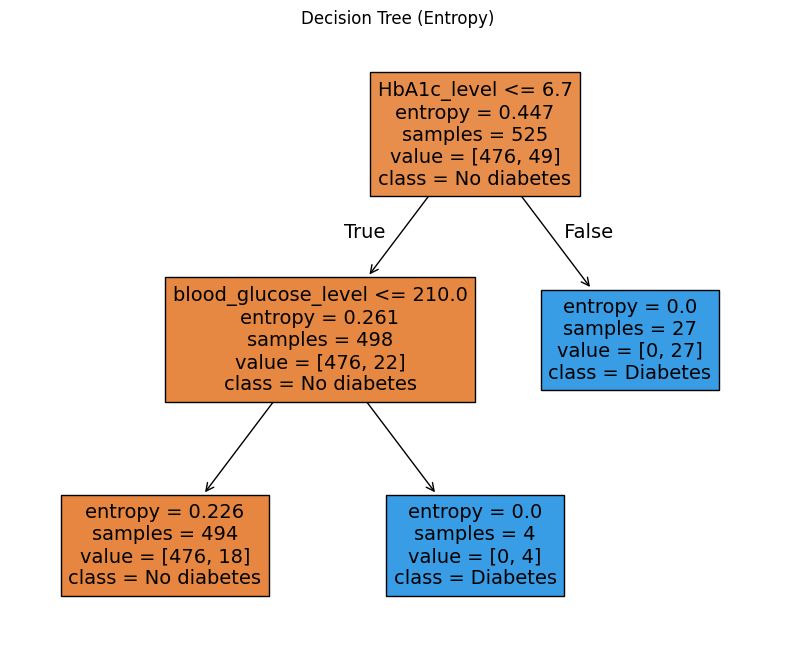

In [22]:
# Plot for Entropy-based Decision Tree
plt.figure(figsize=(10, 8))
tree.plot_tree(best_model_entropy,  # Entropy model
               feature_names=features,
               class_names=classes,
               filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()

In [2]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

NameError: name 'clf' is not defined

In [24]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

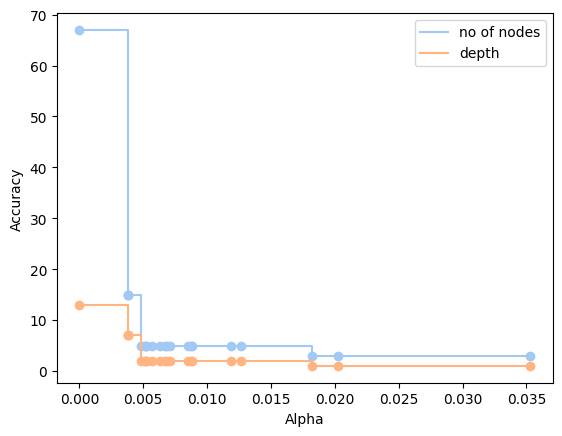

In [25]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

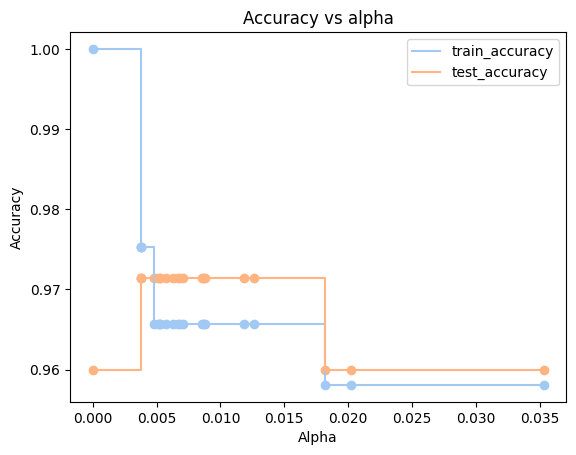

In [26]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title('Accuracy vs alpha')
plt.show()
#Choose the Best alpha:
#Look for the alpha where the test accuracy is maximized or stabilizes.
#Avoid overfitting (when training accuracy is much higher than test accuracy).

In [30]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.005)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

Train score 0.9657142857142857
Test score 0.9714285714285714


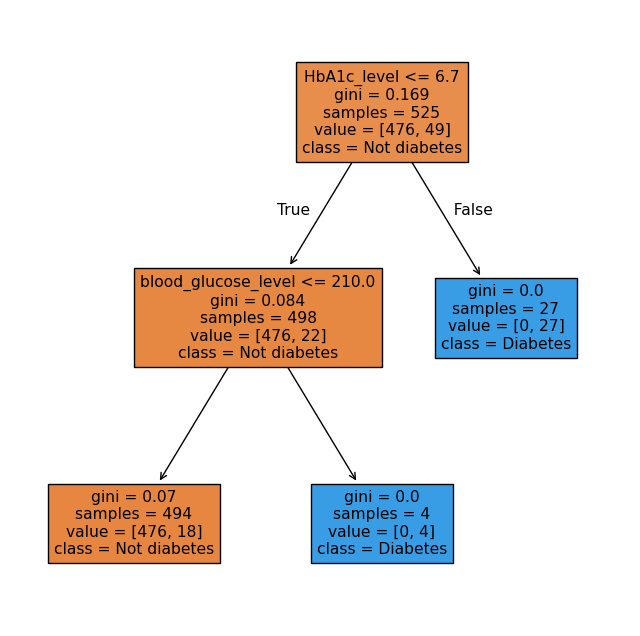

In [31]:
plt.figure(figsize=(8,8))
features = df.columns
classes = ['Not diabetes','Diabetes']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

In [29]:
clf_ = tree.DecisionTreeClassifier(random_state=0, criterion='entropy',ccp_alpha=0.005)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

Train score 0.9942857142857143
Test score 0.9714285714285714


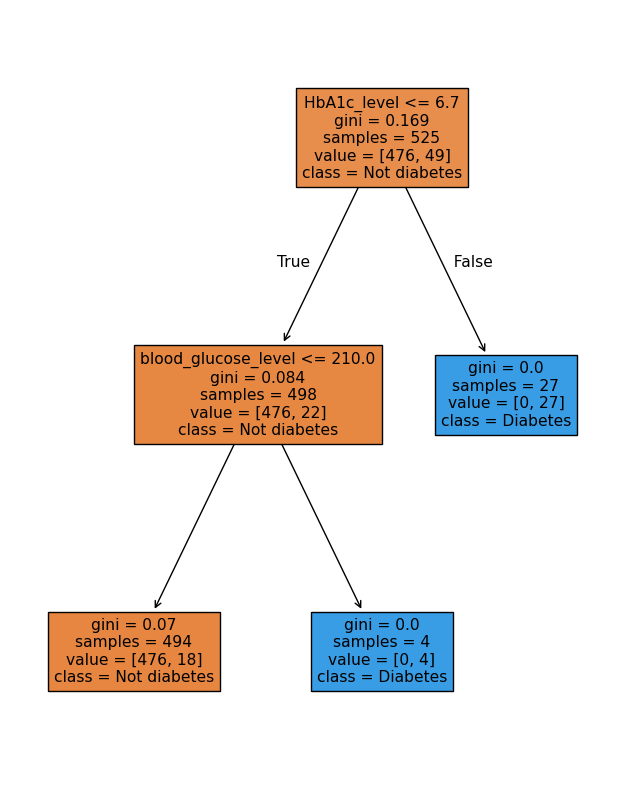

In [32]:
plt.figure(figsize=(8,10))
features = df.columns
classes = ['Not diabetes','Diabetes']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

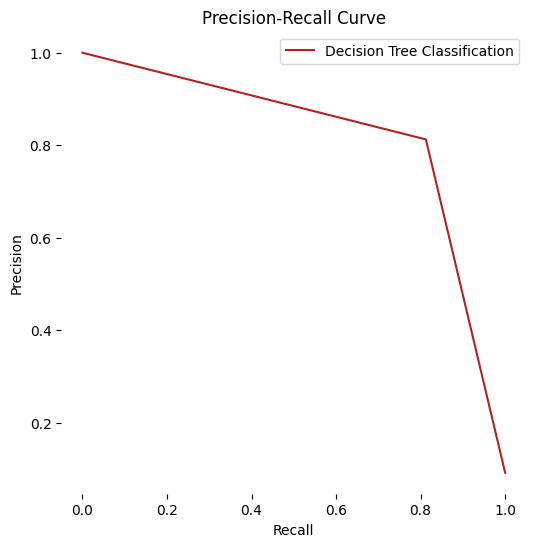

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=0, criterion='entropy')
classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall curve
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(recall, precision, label='Decision Tree Classification', color='firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend()

# Show the plot
plt.show()


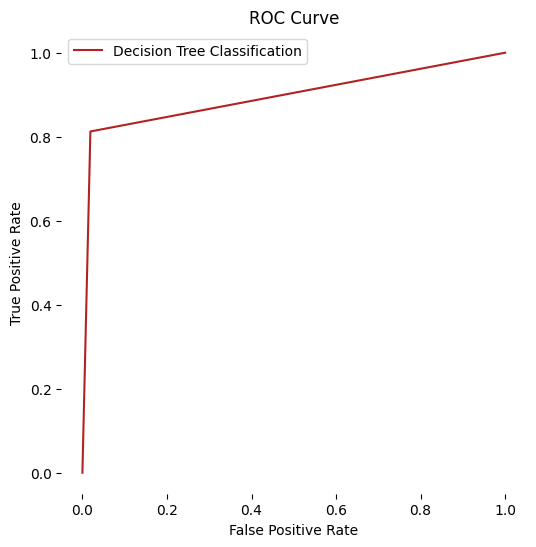

In [34]:
# Plot AUC/ROC curve

from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

#Interpreation
    # ROC (Receiver Operating Characteristic) is a curve that plots the (TPR) against the (FPR)
    # Curve rise towards the top-left corner, indicating that the model has a high true positive rate with a low false positive rate. 
    # The more the curve is closer to the upper left corner, the better the mode

In [35]:
# 3. Decision Tree with Gini-index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

# Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy (Gini): {accuracy_gini}")

# 4. Decision Tree with Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
# Accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy (Entropy): {accuracy_entropy}")

# Calculating the accuracy by comparing the predicted values (y_pred_entropy) with the actual test labels (y_test)
# Entropy criterion, focusing on information gain, has resulted in a model with high accuracy in this case.

#Interpretaion 
    # Calculating the accuracy of the model by comparing the predicted values (y_pred_gini) with the actual test labels (y_test)
    # 95% of the predictions made by the model on the test data were correct, # 5. Analysis of Precision, Recall, and F-Score
print("Classification Report (Gini):")
print(classification_report(y_test, y_pred_gini))

print("Classification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))

#Accuracy: The proportion of correct predictions out of all predictions.
#Precision: The proportion of correct positive predictions  out of all predicted positives
#Recall: The proportion of correct positive predictions out of all actual positives 

Accuracy (Gini): 0.9657142857142857
Accuracy (Entropy): 0.96
Classification Report (Gini):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.86      0.75      0.80        16

    accuracy                           0.97       175
   macro avg       0.92      0.87      0.89       175
weighted avg       0.96      0.97      0.96       175

Classification Report (Entropy):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       159
           1       0.80      0.75      0.77        16

    accuracy                           0.96       175
   macro avg       0.89      0.87      0.88       175
weighted avg       0.96      0.96      0.96       175

